In [147]:
#import libraries
import numpy as np
import pandas as pd
import random

In [148]:
###TRAINING STAGE
#init variable
learningRate = 1
epoch = 1000

In [149]:
data = np.array(
[   
    [[0,0,0,0,0,0,0,0,0,
      0,0,0,0,1,0,0,0,0,
      0,0,1,0,1,0,1,0,0,
      0,0,1,1,1,1,1,0,0,
      0,0,1,1,1,1,1,0,0,
      0,0,1,1,1,1,1,0,0,
      0,0,1,1,1,1,1,0,0,
      0,0,1,0,0,0,1,0,0,
      0,0,0,0,0,0,0,0,0,1],1],

    [[0,0,0,0,0,0,0,0,0,
      0,0,0,0,1,0,0,0,0,
      0,0,0,1,1,1,0,0,0,
      0,0,1,1,1,1,1,0,0,
      0,1,1,1,1,1,1,1,0,
      0,1,0,0,1,1,0,1,0,
      0,1,1,1,1,1,1,1,0,
      0,1,1,1,1,1,1,1,0,
      0,0,0,0,0,0,0,0,0,1],0]

]
)

In [150]:
#init weight
def init_weights():
    global syn0
    syn0 = np.zeros((82, 1))

In [151]:
#activation function
def actFunction(x):
    if x is int:
        return 0 if x < 0 else 1
    else:
        return [(0 if num < 0 else 1)for num in x]

def feedForward(X):
    l1_accumulation = np.dot(X, syn0)
    l1_activation = actFunction(l1_accumulation)
    return l1_accumulation

In [152]:
init_weights()

def getIdx(target):
    for i in range(2):
        if data[i][1] == target:
            return i

for loop in range(1, epoch+1):
    current_data = random.choice(data)
    input_data, target = current_data

    output = feedForward(input_data)
    error = np.subtract(target, output)
    if loop%(epoch/10) == 0:
        print(f"epoch: {loop}, error: {error} with data {getIdx(target)}")

    syn0_gradient = np.multiply(input_data, error)
    syn0 = (syn0.T + (learningRate*syn0_gradient)).T

epoch: 100, error: [1.85628398e+137] with data 1
epoch: 200, error: [1.94939852e+276] with data 1
epoch: 300, error: [nan] with data 1
epoch: 400, error: [nan] with data 0
epoch: 500, error: [nan] with data 0
epoch: 600, error: [nan] with data 1
epoch: 700, error: [nan] with data 1
epoch: 800, error: [nan] with data 1
epoch: 900, error: [nan] with data 0
epoch: 1000, error: [nan] with data 1


In [153]:
#testing stage
test_data_amount = 500+2
#2 test data comes from input itself

In [154]:
test_input = []
test_target = []

for test_data_num in range (test_data_amount-2):
    choice = random.choice(data)
    new_input = choice[0].copy()
    new_target = choice[1]

    flip_amount = random.randint(0, 20) #range of noise

    for flip in range(flip_amount):
        position_to_flip = random.randint(0, 80) #chosee random pixel to flip

        #flip 1 to 0
        new_input[position_to_flip] = 1-new_input[position_to_flip]

    test_input.append(new_input)
    test_target.append(new_target)

#include train data to be tested
for train_data in data:
    test_input.append(train_data[0])
    test_target.append(train_data[1])

test_input = np.array(test_input)
test_target = np.array(test_target)

In [155]:
#testing
test_output = feedForward(test_input)
test_output_rounded = [np.round(x) for x in test_output]

In [175]:
matchResult = []
for index in range (test_data_amount):
    if test_output_rounded[index] == test_target[index]:
        matchResult.append(index)

match_count = len(matchResult)

accuracy = match_count/test_data_amount
print(f"acc: {accuracy*100}%")

acc: 0.0%


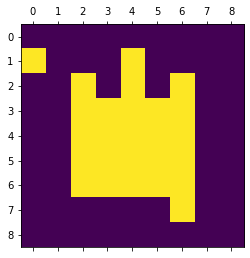

In [174]:
import matplotlib.pyplot as plt

choice = random.choice(data)
new_input = choice[0].copy()

for flip in range(4):
    position_to_flip = random.randint(0,80)
    new_input[position_to_flip] = 1-new_input[position_to_flip]

matrix = []

for i in range(9):
    row = []
    for j in range(9):
        row.append(new_input[i*9+j])
    matrix.append(row)

plt.matshow(matrix)
plt.show()